# **Trabalho Processamento e Análise de Imagens**

### *Importações utilizadas no trabalho*

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from IPython.display import clear_output as cls
from tensorflow.keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Model 
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Pre-Trained Model
from tensorflow.keras.applications import ResNet50V2 as ResNet50

### *Coletando Local das Imagens de cada classe*

In [2]:
urlimgtreinoD = []
urlimgtesteD = []
urlimgtreinoE = []
urlimgtesteE = []
urlimgtreinoF = []
urlimgtesteF = []
urlimgtreinoG = []
urlimgtesteG = []
# Diretório contendo as imagens de mamografia
raiz = 'S:/Desktop/PAI-github/mamografias/'
diretoriototal = os.listdir(raiz)

for diretorios in diretoriototal:
    caminhodiretorio = raiz + diretorios
    # Separar as imagens para treinamento e teste & Criar diretorio de teste e treino
    imagens = os.listdir(caminhodiretorio)
    if(diretorios[0] == 'D'):
        for img in imagens:
            if (int(img.split('(')[-1].split(')')[0]) % 4 == 0):
                urlimgtesteD.append(caminhodiretorio + '/' + img)
            else:
                urlimgtreinoD.append(caminhodiretorio + '/' + img)
    if(diretorios[0] == 'E'):
        for img in imagens:
            if (int(img.split('(')[-1].split(')')[0]) % 4 == 0):
                urlimgtesteE.append(caminhodiretorio + '/' + img)
            else:
                urlimgtreinoE.append(caminhodiretorio + '/' + img) 
    if(diretorios[0] == 'F'):
        for img in imagens:
            if (int(img.split('(')[-1].split(')')[0]) % 4 == 0):
                urlimgtesteF.append(caminhodiretorio + '/' + img)
            else:
                urlimgtreinoF.append(caminhodiretorio + '/' + img)
    if(diretorios[0] == 'G'):
        for img in imagens:
            if (int(img.split('(')[-1].split(')')[0]) % 4 == 0):
                urlimgtesteG.append(caminhodiretorio + '/' + img)
            else:
                urlimgtreinoG.append(caminhodiretorio + '/' + img)

## **Processamento para a classificação de 4 classes**

### Segmentação, ampliação e separação da base de dados de 4 classes

In [20]:
def segment_mammary_region(image):
    # Aplicar limiarização adaptativa para segmentar a região da mama
    _, thresholded = cv2.threshold(
        image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar os contornos dos objetos na imagem binarizada
    contours, _ = cv2.findContours(
        thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar o contorno da mama (maior área)
    largest_contour = max(contours, key=cv2.contourArea)

    # Criar uma máscara em branco do tamanho da imagem
    mask = np.zeros_like(image)

    # Desenhar o contorno da mama na máscara
    cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

    # Criar uma nova imagem apenas com a região da mama
    result_image = cv2.bitwise_and(image, image, mask=mask)

    return result_image


classes = ["D", "E", "F", "G"]
for element in classes:
    # Definir o caminho completo para o diretório de destino
    namedir = "Test_Data"
    if not os.path.exists(namedir):
        # Criar a pasta
        os.makedirs(namedir)
    place = namedir + "/" + element
    if not os.path.exists(place):
        os.makedirs(place)

    diretorio_teste = os.getcwd() + "/" + place

    if element == "D":
        for imgurl in urlimgtesteD:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)
    if element == "E":
        for imgurl in urlimgtesteE:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)
    if element == "F":
        for imgurl in urlimgtesteF:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)
    if element == "G":
        for imgurl in urlimgtesteG:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)


for element in classes:
    # Definir o caminho completo para o diretório de destino
    namedir = "Train_Data"
    if not os.path.exists(namedir):
        # Criar a pasta
        os.makedirs(namedir)
    place = namedir + "/" + element
    if not os.path.exists(place):
        os.makedirs(place)

    diretorio_treino = os.getcwd() + "/" + place
    if element == "D":
        for imgurl in urlimgtreinoD:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)
    if element == "E":
        for imgurl in urlimgtreinoE:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)
    if element == "F":
        for imgurl in urlimgtreinoF:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)
    if element == "G":
        for imgurl in urlimgtreinoG:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)


C:\Users\smili\AppData\Local\Temp/ipykernel_15160/1496851303.py:96: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\smili\AppData\Local\Temp/ipykernel_15160/1496851303.py:116: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\smili\AppData\Local\Temp/ipykernel_15160/1496851303.py:136: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\smili\AppData\Local\Temp/ipykernel_15160/1496851303.py:156: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead

### Separação dos dados de teste e de treino

In [3]:
# Initialize Generator
train_path = 'S:\Desktop\PAI-github\PAI\Train_Data'
test_path = 'S:\Desktop\PAI-github\PAI\Test_Data'

train_gen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=10,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1/255)

# Load Data
train_ds = train_gen.flow_from_directory(
    train_path, class_mode='binary', target_size=(256, 256), shuffle=True, batch_size=32)
test_ds = test_gen.flow_from_directory(
    test_path, class_mode='binary', target_size=(256, 256), shuffle=True, batch_size=32)


Found 11328 images belonging to 4 classes.
Found 1248 images belonging to 4 classes.


### Treinamento da rede neural - 4 Classes

In [25]:
with tf.device("/GPU:0"):
    ## Pre-Trained Model 
    base_model = ResNet50(input_shape=(256,256,3), include_top=False)
    base_model.trainable = False
    cls()

    # Model Architecture
    name = "ResNet50"
    model = Sequential([
        base_model,
        GAP(),
        Dense(512, activation='relu', kernel_initializer='he_normal'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ], name=name)

    # Callbacks
    cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

    # Model 
    opt = tf.keras.optimizers.Adam(learning_rate=2e-3)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Model Training
    history = model.fit(train_ds, validation_data=test_ds, callbacks=cbs, epochs=5)

Epoch 1/8
354/354 [==============================] - 772s 2s/step - loss: 1.0775 - accuracy: 0.5303 - val_loss: 0.8726 - val_accuracy: 0.6130
Epoch 2/8
354/354 [==============================] - 665s 2s/step - loss: 0.9210 - accuracy: 0.5833 - val_loss: 0.8641 - val_accuracy: 0.6178
Epoch 3/8
354/354 [==============================] - 638s 2s/step - loss: 0.8875 - accuracy: 0.6038 - val_loss: 0.8700 - val_accuracy: 0.6218
Epoch 4/8
354/354 [==============================] - 639s 2s/step - loss: 0.8579 - accuracy: 0.6172 - val_loss: 0.8479 - val_accuracy: 0.6330
Epoch 5/8
354/354 [==============================] - 639s 2s/step - loss: 0.8500 - accuracy: 0.6276 - val_loss: 0.7929 - val_accuracy: 0.6530
Epoch 6/8
354/354 [==============================] - 635s 2s/step - loss: 0.8396 - accuracy: 0.6265 - val_loss: 0.8019 - val_accuracy: 0.6562
Epoch 7/8
354/354 [==============================] - 641s 2s/step - loss: 0.8294 - accuracy: 0.6315 - val_loss: 0.8660 - val_accuracy: 0.6386
Epoch 

### Estrutura do modelo utilizado e validação

In [26]:
data = pd.DataFrame(history.history)

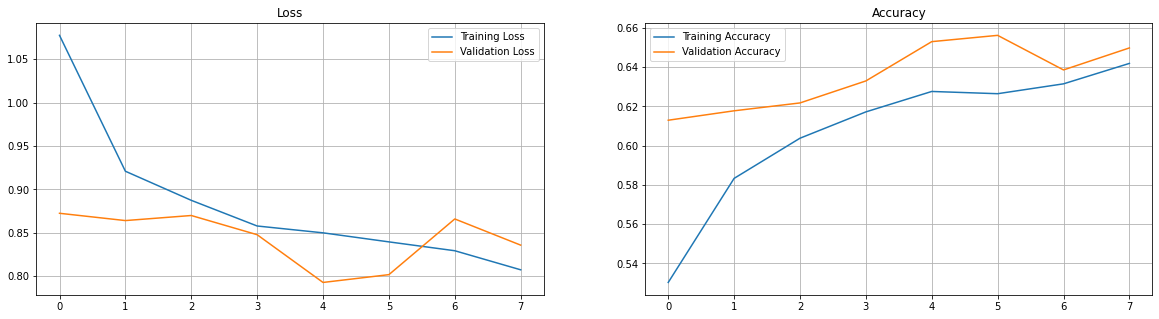

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(data.loss, label='Training Loss')
plt.plot(data.val_loss, label='Validation Loss')
plt.title("Loss")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(data.accuracy, label='Training Accuracy')
plt.plot(data.val_accuracy, label='Validation Accuracy')
plt.title("Accuracy")
plt.grid()
plt.legend()

plt.show()

In [28]:
model = load_model('S:/Desktop/PAI-github/PAI/Resnet50.h5')
model.summary()

Model: "ResNet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 24,615,940
Trainable params: 1,051,140
Non-trainable params: 23,564,800
______________________________________

In [29]:
model.evaluate(test_ds)

39/39 [==============================] - 66s 2s/step - loss: 0.7929 - accuracy: 0.6530


[0.7928664684295654, 0.6530448794364929]

### *Mostrar Imagem & Predições*

In [52]:
classes = ["D", "E", "F", "G"]
def show_images(GRID=[5,5], model=None, size=(20,20), data=train_ds):
    n_rows = GRID[0]
    n_cols = GRID[1]
    n_images = n_cols * n_rows
    
    i = 1
    plt.figure(figsize=size)
    for images, labels in data:
        id = np.random.randint(len(images))
        image, label = images[id], classes[int(labels[id])]
        
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        
        if model is None:
            title = f"Class : {label}"
        else:
            pred = classes[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"Org : {label}, Pred : {pred}"
            cls()
        
        plt.title(title)
        plt.axis('off')
        
        i+=1
        if i>=(n_images+1):
            break
            
    plt.tight_layout()
    plt.show()

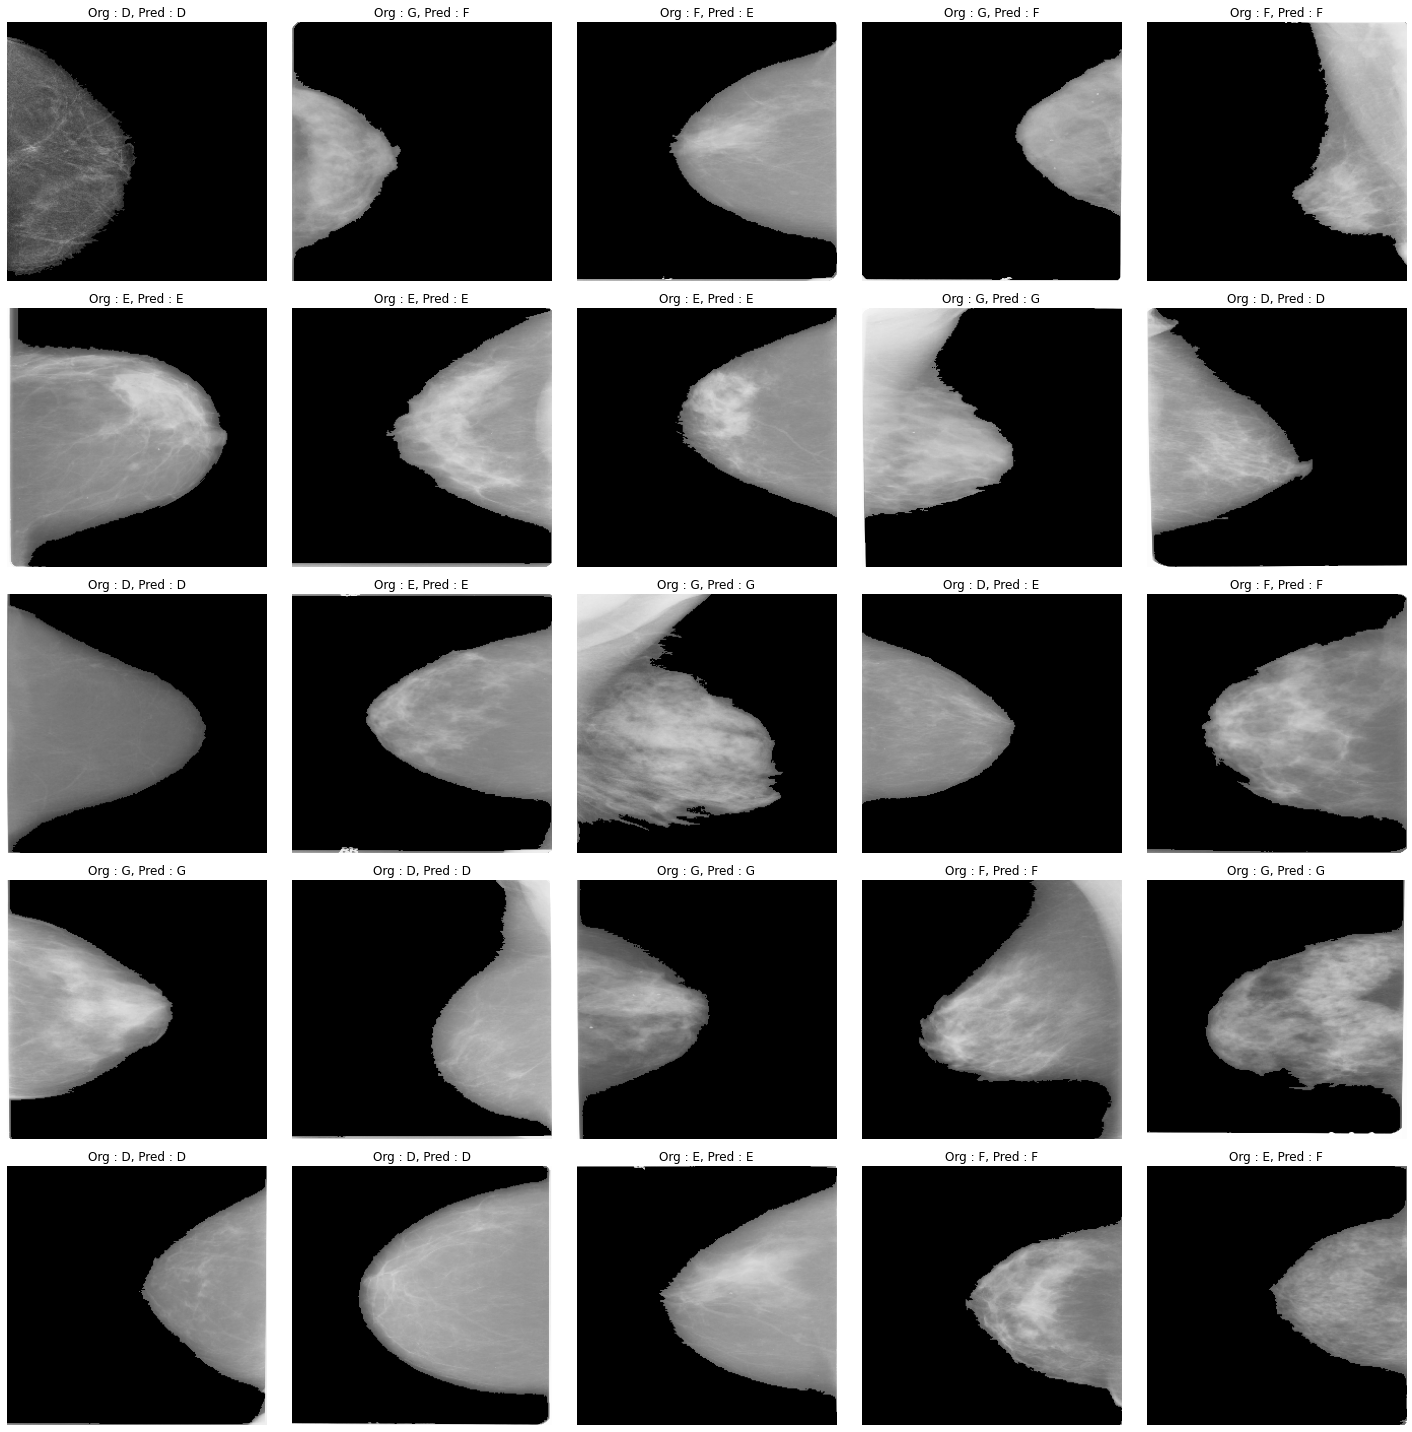

In [39]:
show_images(model=model, data=test_ds)

## **Processamento para a classificação de binária**

### Segmentação, ampliação e separação da base de dados binária

In [6]:
def segment_mammary_region(image):
    # Aplicar limiarização adaptativa para segmentar a região da mama
    _, thresholded = cv2.threshold(
        image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar os contornos dos objetos na imagem binarizada
    contours, _ = cv2.findContours(
        thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar o contorno da mama (maior área)
    largest_contour = max(contours, key=cv2.contourArea)

    # Criar uma máscara em branco do tamanho da imagem
    mask = np.zeros_like(image)

    # Desenhar o contorno da mama na máscara
    cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

    # Criar uma nova imagem apenas com a região da mama
    result_image = cv2.bitwise_and(image, image, mask=mask)

    return result_image


classes = ["I", "II"]
for element in classes:
    # Definir o caminho completo para o diretório de destino
    namedir = "Test_DataBinary"
    if not os.path.exists(namedir):
        # Criar a pasta
        os.makedirs(namedir)
    place = namedir + "/" + element
    if not os.path.exists(place):
        os.makedirs(place)

    diretorio_teste = os.getcwd() + "/" + place

    if element == "I":
        for imgurl in urlimgtesteD:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)
    if element == "I":
        for imgurl in urlimgtesteE:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)
    if element == "II":
        for imgurl in urlimgtesteF:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)
    if element == "II":
        for imgurl in urlimgtesteG:
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_teste + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)


for element in classes:
    # Definir o caminho completo para o diretório de destino
    namedir = "Train_DataBinary"
    if not os.path.exists(namedir):
        # Criar a pasta
        os.makedirs(namedir)
    place = namedir + "/" + element
    if not os.path.exists(place):
        os.makedirs(place)

    diretorio_treino = os.getcwd() + "/" + place
    if element == "I":
        for imgurl in urlimgtreinoD:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)
    if element == "I":
        for imgurl in urlimgtreinoE:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)
    if element == "II":
        for imgurl in urlimgtreinoF:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)
    if element == "II":
        for imgurl in urlimgtreinoG:
            # Copiar imagens para a nova pasta com a mascara aplicada
            imagem = cv2.imread(imgurl, cv2.IMREAD_GRAYSCALE)
            segmented_image = segment_mammary_region(imagem)
            fileName = imgurl.split("/")
            caminho_destino = diretorio_treino + '/' + fileName[-1]
            cv2.imwrite(caminho_destino, segmented_image)

            # Criar uma copia com a imagem equalizada
            caminho_destino_equalizada = diretorio_treino + '/equalizada_' + fileName[-1]
            imagem = cv2.imread(caminho_destino, 0)
            imagem_equalizada = cv2.equalizeHist(imagem)
            cv2.imwrite(caminho_destino_equalizada, imagem_equalizada)

            # Criar uma copia com a imagem espelhada
            imagem = Image.open(caminho_destino)
            imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
            caminho_destino = diretorio_treino + '/espelhada_' + fileName[-1]
            imagem_espelhada.save(caminho_destino)


C:\Users\smili\AppData\Local\Temp/ipykernel_15160/2573466361.py:96: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\smili\AppData\Local\Temp/ipykernel_15160/2573466361.py:116: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\smili\AppData\Local\Temp/ipykernel_15160/2573466361.py:136: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  imagem_espelhada = imagem.transpose(Image.FLIP_LEFT_RIGHT)
C:\Users\smili\AppData\Local\Temp/ipykernel_15160/2573466361.py:156: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead

### Separação dos dados de teste e de treino

In [5]:
# Initialize Generator
trainbinary_path = 'S:\Desktop\PAI-github\PAI\Train_DataBinary'
testbinary_path = 'S:\Desktop\PAI-github\PAI\Test_DataBinary'

trainbinary_gen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=10,
    horizontal_flip=True
)

testbinary_gen = ImageDataGenerator(rescale=1/255)

# Load Data
trainbinary_ds = trainbinary_gen.flow_from_directory(
    trainbinary_path, class_mode='binary', target_size=(256, 256), shuffle=True, batch_size=32)
testbinary_ds = testbinary_gen.flow_from_directory(
    testbinary_path, class_mode='binary', target_size=(256, 256), shuffle=True, batch_size=32)

Found 11328 images belonging to 2 classes.
Found 1248 images belonging to 2 classes.


### Treinamento da rede neural - binária

In [6]:
with tf.device("/GPU:0"):
    ## Pre-Trained Model 
    base_model = ResNet50(input_shape=(256,256,3), include_top=False)
    base_model.trainable = False
    cls()

    # Model Architecture
    name = "ResNet50Binary"
    model = Sequential([
        base_model,
        GAP(),
        Dense(256, activation='relu', kernel_initializer='he_normal'),
        Dropout(0.2),
        Dense(4, activation='softmax')
    ], name=name)

    # Callbacks
    cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

    # Model 
    opt = tf.keras.optimizers.Adam(learning_rate=2e-3)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Model Training
    history = model.fit(trainbinary_ds, validation_data=testbinary_ds, callbacks=cbs, epochs=10)

Epoch 1/10
354/354 [==============================] - 730s 2s/step - loss: 0.4275 - accuracy: 0.8153 - val_loss: 0.3502 - val_accuracy: 0.8478
Epoch 2/10
354/354 [==============================] - 754s 2s/step - loss: 0.3424 - accuracy: 0.8471 - val_loss: 0.3216 - val_accuracy: 0.8518
Epoch 3/10
354/354 [==============================] - 725s 2s/step - loss: 0.3211 - accuracy: 0.8560 - val_loss: 0.3178 - val_accuracy: 0.8550
Epoch 4/10
354/354 [==============================] - 705s 2s/step - loss: 0.3040 - accuracy: 0.8621 - val_loss: 0.3189 - val_accuracy: 0.8614
Epoch 5/10
354/354 [==============================] - 707s 2s/step - loss: 0.2993 - accuracy: 0.8686 - val_loss: 0.3135 - val_accuracy: 0.8630
Epoch 6/10
354/354 [==============================] - 681s 2s/step - loss: 0.2891 - accuracy: 0.8715 - val_loss: 0.3207 - val_accuracy: 0.8622
Epoch 7/10
354/354 [==============================] - 678s 2s/step - loss: 0.2924 - accuracy: 0.8712 - val_loss: 0.3263 - val_accuracy: 0.8670

### Estrutura do modelo utilizado e validação

In [7]:
data = pd.DataFrame(history.history)

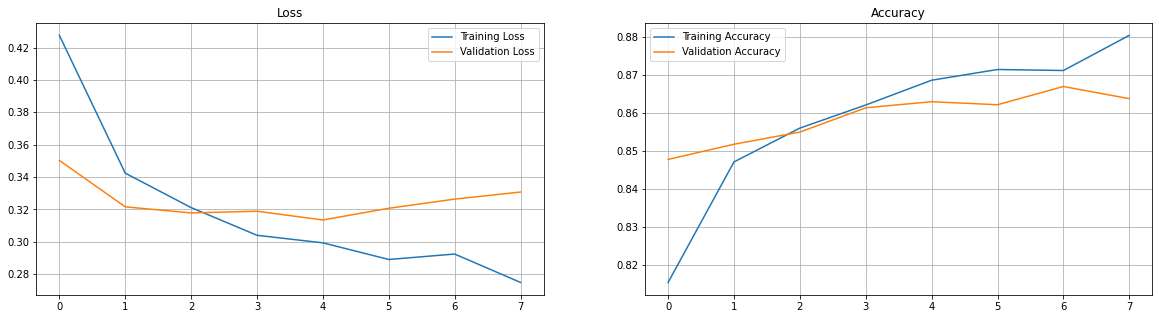

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(data.loss, label='Training Loss')
plt.plot(data.val_loss, label='Validation Loss')
plt.title("Loss")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(data.accuracy, label='Training Accuracy')
plt.plot(data.val_accuracy, label='Validation Accuracy')
plt.title("Accuracy")
plt.grid()
plt.legend()

plt.show()

In [9]:
model = load_model('S:/Desktop/PAI-github/PAI/ResNet50Binary.h5')
model.summary()

Model: "ResNet50Binary"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 24,090,372
Trainable params: 525,572
Non-trainable params: 23,564,800
__________________________________

In [10]:
model.evaluate(testbinary_ds)

39/39 [==============================] - 66s 2s/step - loss: 0.3135 - accuracy: 0.8630


[0.31346234679222107, 0.8629807829856873]

### *Mostrar Imagem & Predições*

In [50]:
classes = ["I", "II"]
def show_images(GRID=[5,5], model=None, size=(20,20), data=trainbinary_ds):
    n_rows = GRID[0]
    n_cols = GRID[1]
    n_images = n_cols * n_rows
    
    i = 1
    plt.figure(figsize=size)
    for images, labels in data:
        id = np.random.randint(len(images))
        image, label = images[id], classes[int(labels[id])]
        
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        
        if model is None:
            title = f"Class : {label}"
        else:
            pred = classes[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"Org : {label}, Pred : {pred}"
            cls()
        
        plt.title(title)
        plt.axis('off')
        
        i+=1
        if i>=(n_images+1):
            break
            
    plt.tight_layout()
    plt.show()

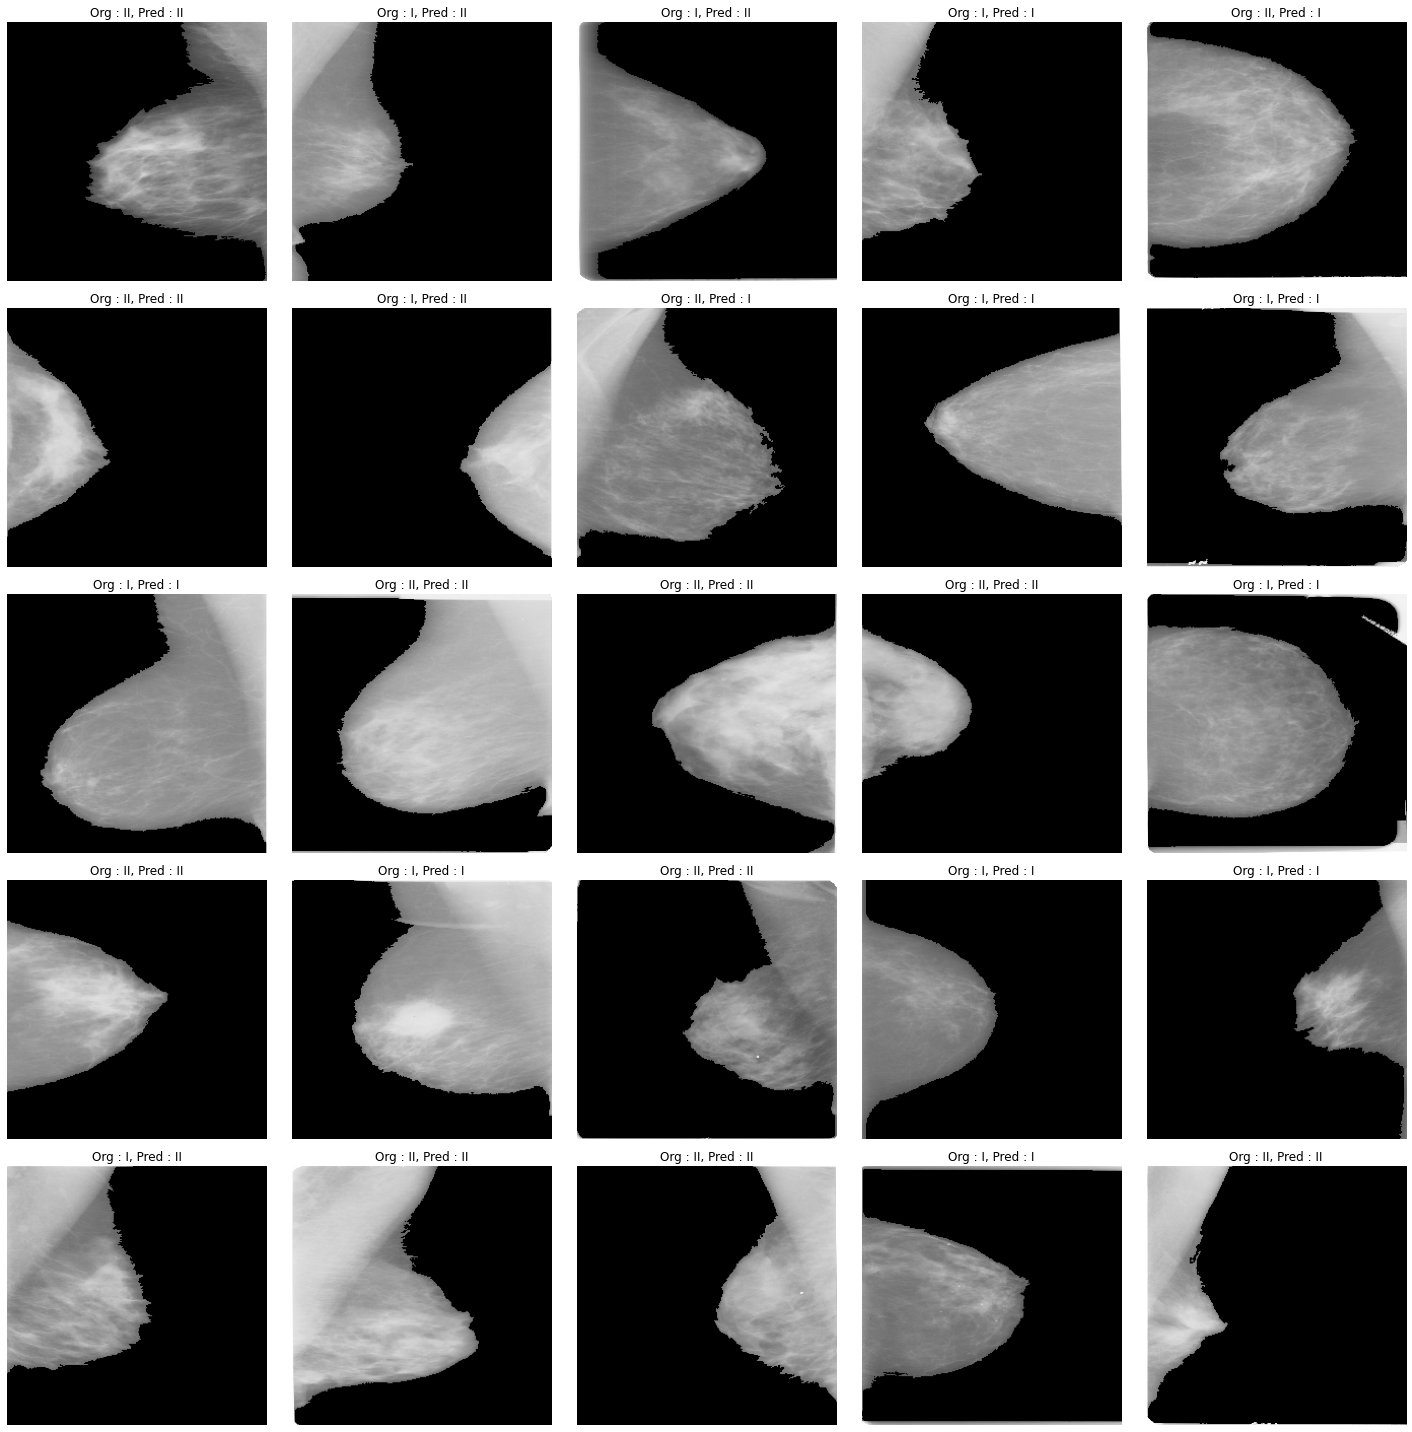

In [51]:
show_images(model=model, data=testbinary_ds)

## Teste do modelo

In [42]:
# Class Names
classes = ["D", "E", "F", "G"]
classesBinary = ["I","II"]
# Carrega a imagem e redimensiona
img = image.load_img('processImage.tiff', target_size=(256, 256, 3))

# Normaliza a imagem
img_array = image.img_to_array(img)
img_array /= 255.

# Cria um objeto EagerTensor a partir da imagem normalizada
img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)

# Adiciona uma dimensão extra para o modelo
img_tensor = tf.expand_dims(img_tensor, axis=0)

# Carrega o modelo
model = load_model('ResNet50Binary.h5')

# Faz a predição na imagem
predictions = model.predict(img_tensor)

# Converte a saída para um rótulo de texto
# SELECIONAR A CLASSE - BINARIA OU COM 4 CLASSES (classe,classeBinary)
predicted_label = classesBinary[np.argmax(predictions)]

# Exibe a classe prevista
result = "A classe referente é " + predicted_label
print(result)

1/1 [==============================] - 1s 1s/step
A classe referente é I
